### **Disease Prediction using Medical data (Pima Indians Diabates Dataset)**

> Accuracy==75.32%


> © 2024 Noman Ajaz. All Rights Reserved.




## Loading and Preprocessing Data

In [7]:
import pandas as pd

def load_dataset(dataset_path):
    return pd.read_csv(dataset_path)

def preprocess_data(data):
    # Handling missing values by replacing zeros with mean values
    data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
    data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
    return data

# Load dataset
dataset_path = "/content/sample_data/diabetes.csv"  # Replace with the actual path
data = load_dataset(dataset_path)
preprocessed_data = preprocess_data(data)


### **Data Visualization**

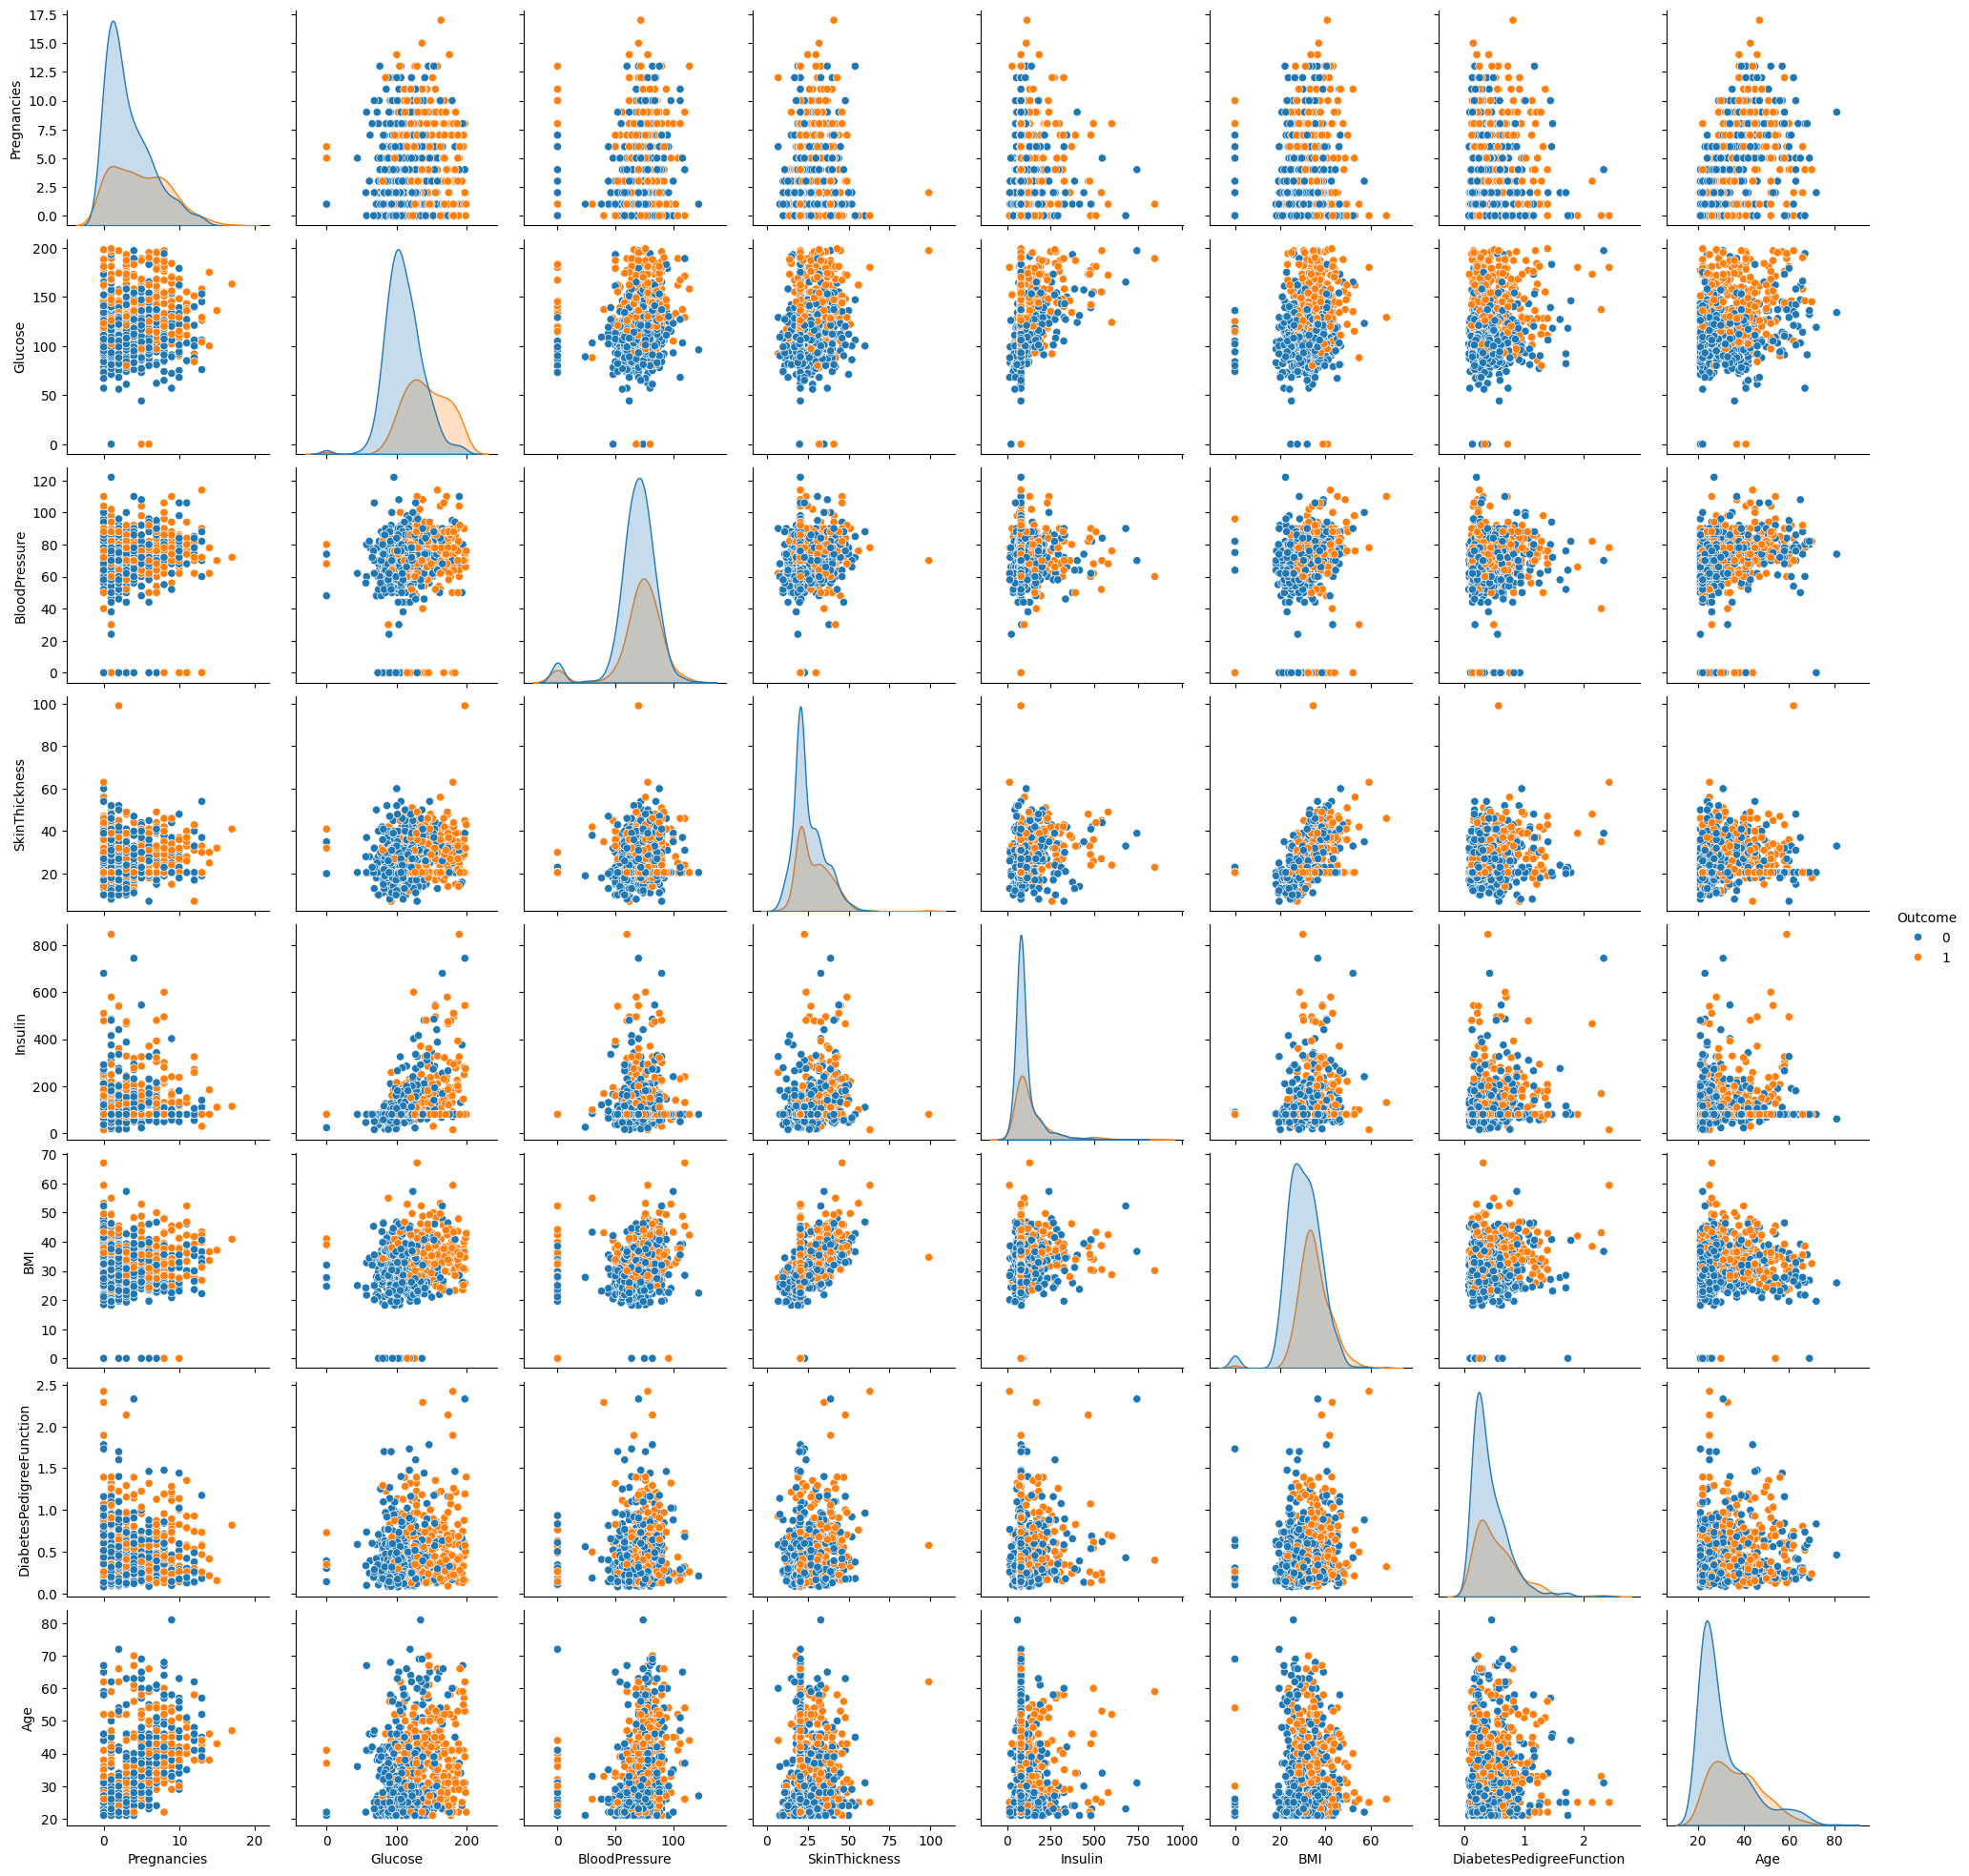

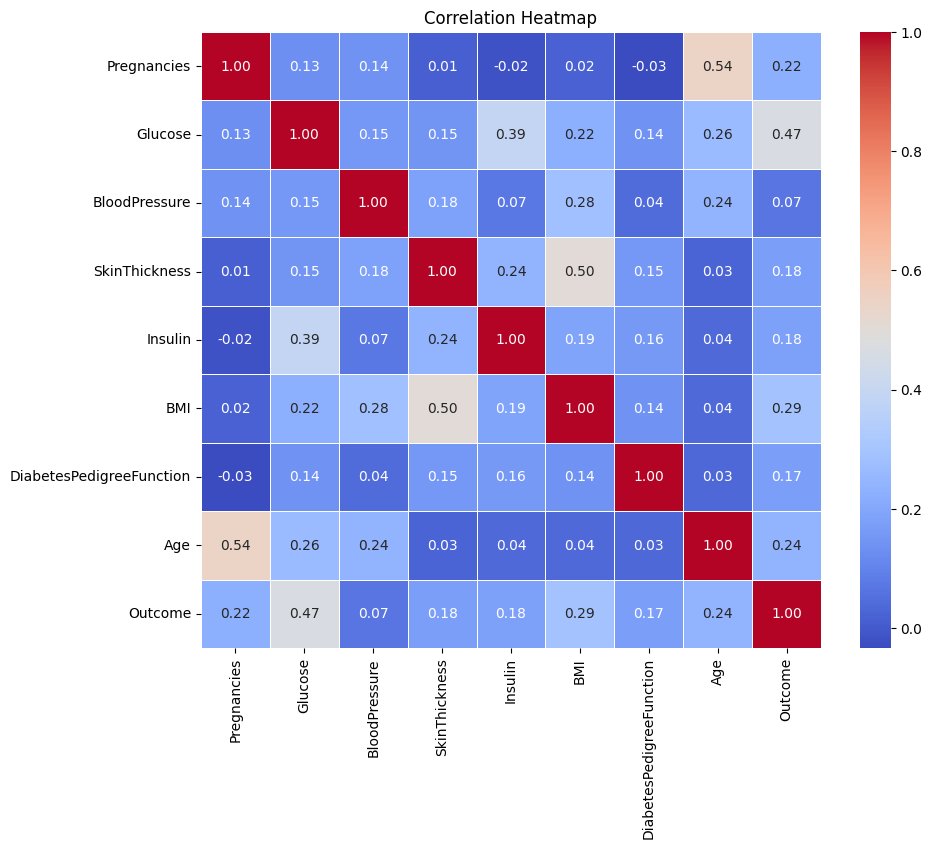

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for visualizing relationships between variables
sns.pairplot(preprocessed_data, hue='Outcome')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### **Training the Model**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split dataset into features and target variable
X = preprocessed_data.drop(columns=['Outcome'])
y = preprocessed_data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Model Training with Hyperparameter Tuning**

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

### **Model Evaluation**

In [11]:
from sklearn.metrics import accuracy_score

# Model Evaluation
X_test_scaled = scaler.transform(X_test)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7532467532467533


### **Prediction with User Input and Visualization**

In [15]:
# User Input and Prediction
pregnancies = float(input("Number of Pregnancies (integer): "))
glucose = float(input("Glucose Level (mg/dl): "))
blood_pressure = float(input("Blood Pressure (mmHg): "))
skin_thickness = float(input("Skin Thickness (mm): "))
insulin = float(input("Insulin Level (units/ml): "))
bmi = float(input("BMI (kg/m^2): "))
diabetes_pedigree_function = float(input("Diabetes Pedigree Function: "))
age = float(input("Age (years): "))

input_data = pd.DataFrame({
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age]
})

# Feature scaling for input data
input_data_scaled = scaler.transform(input_data)

# Prediction
likelihood = best_model.predict_proba(input_data_scaled)[0][1] * 100  # Percentage likelihood of disease occurrence
print("\nThe likelihood of diabetes occurrence is {:.2f}%".format(likelihood))

# Visualization of model results (if needed)
# Add relevant visualizations here based on the model results


Number of Pregnancies (integer): 15
Glucose Level (mg/dl): 15
Blood Pressure (mmHg): 200
Skin Thickness (mm): 100
Insulin Level (units/ml): 50
BMI (kg/m^2): 300
Diabetes Pedigree Function: 40
Age (years): 1.0

The likelihood of diabetes occurrence is 34.03%
